# Real Estate Price Prediction

In [1]:
import pandas as pd

In [2]:
housing_data = pd.read_csv("data.csv")
housing_data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [3]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
housing_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

<function matplotlib.pyplot.show(close=None, block=None)>

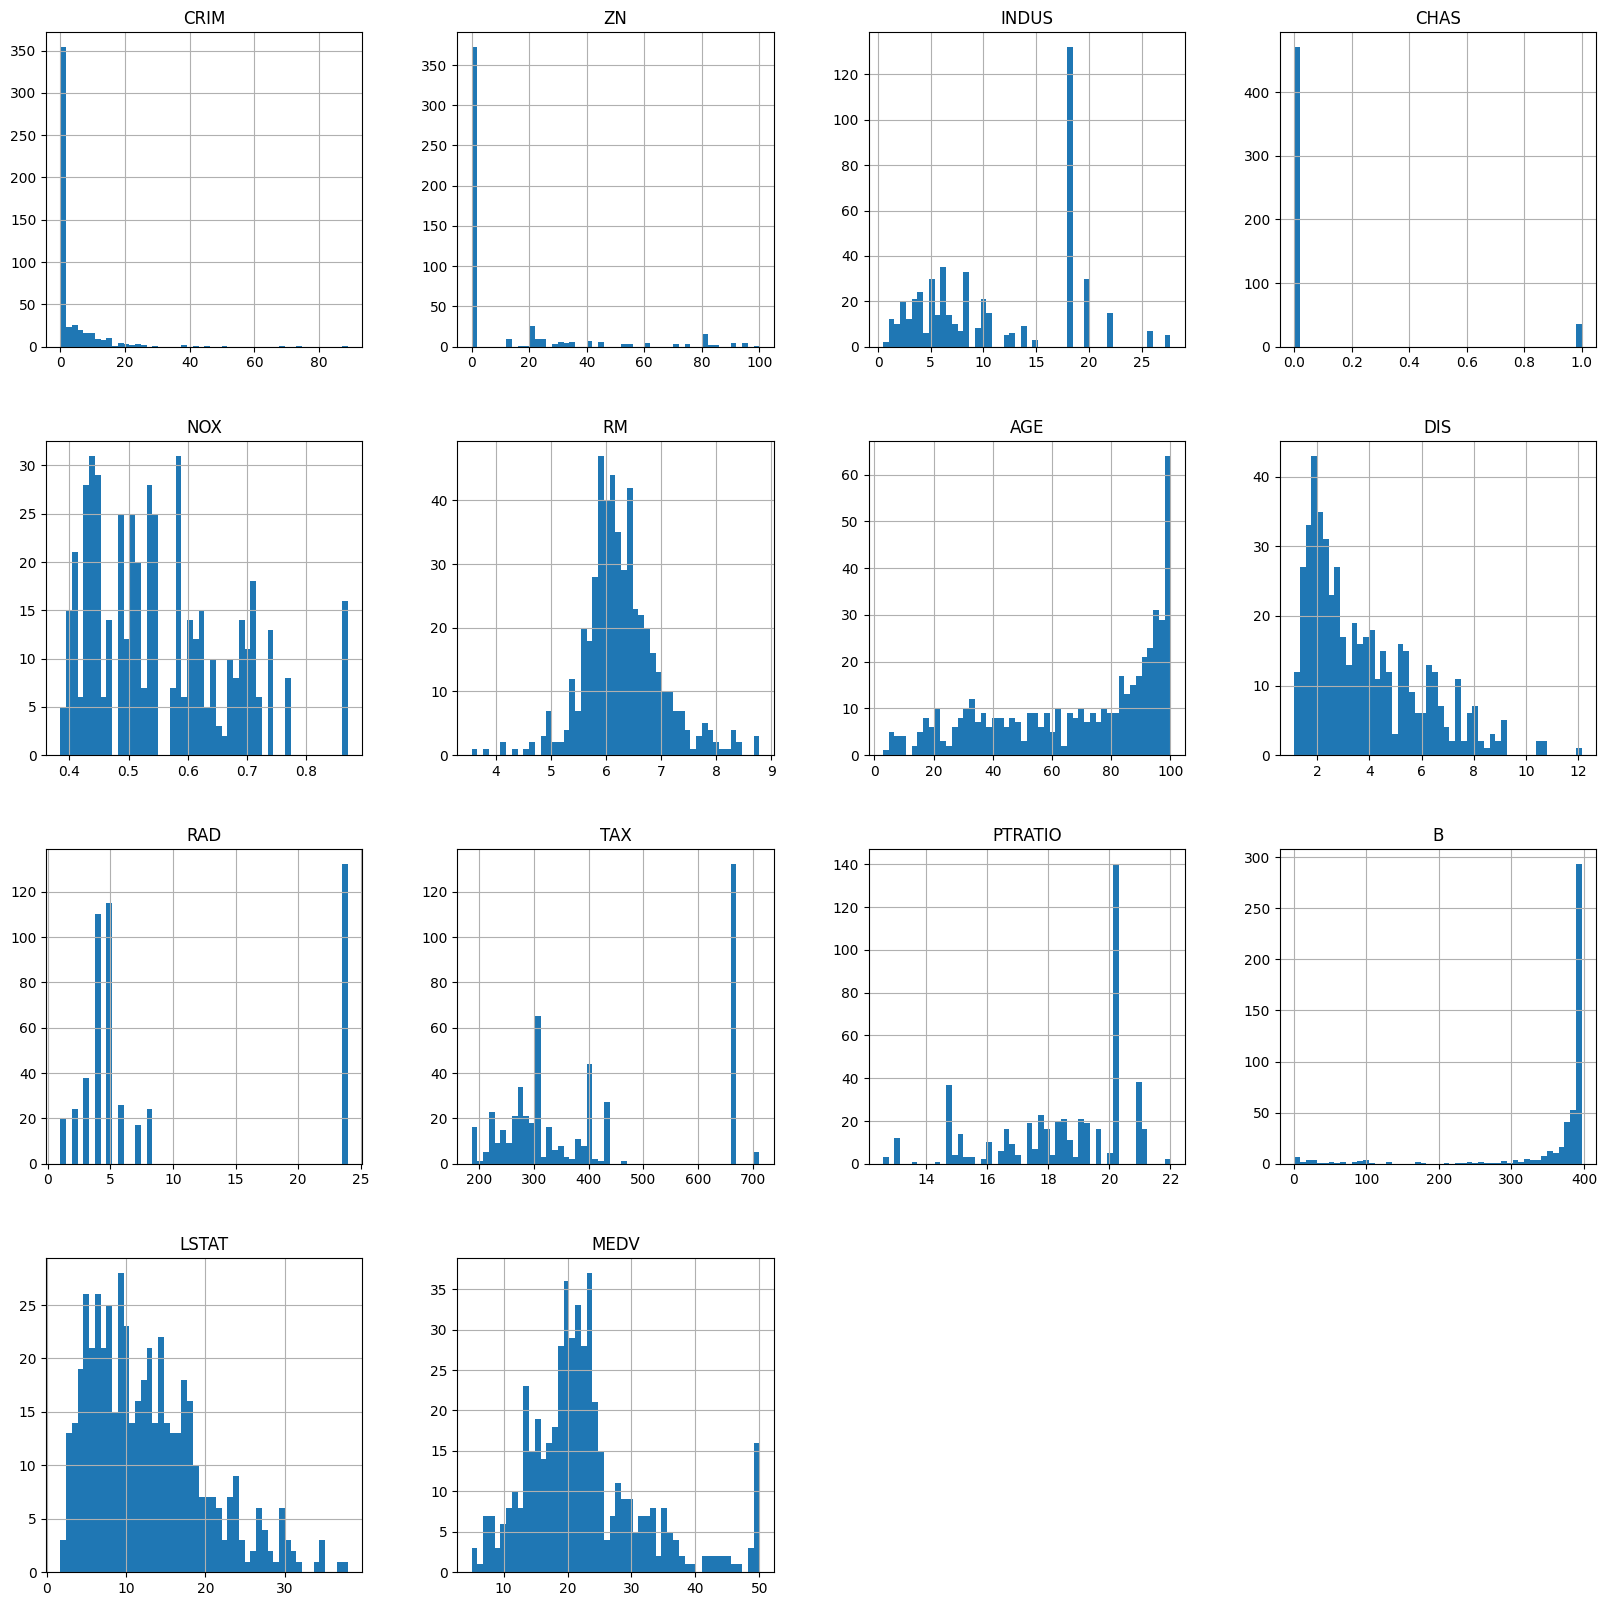

In [6]:
housing_data.hist(bins=50,figsize=(20,20))
plt.show

In [7]:
housing_data["CHAS"].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

### Train Test Split for Preventing Overfitting

In [8]:
from sklearn.model_selection import train_test_split
train_set,test_set= train_test_split(housing_data, test_size=0.2, random_state=44)

In [9]:
print(len(train_set))
print(len(test_set))

404
102


In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
spl=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=44)
for train_index, test_index in spl.split(housing_data,housing_data['CHAS']):
    strat_train=housing_data.loc[train_index]
    strat_test=housing_data.loc[test_index]

In [11]:
strat_train['CHAS'].value_counts()

CHAS
0    376
1     28
Name: count, dtype: int64

In [12]:
strat_test['CHAS'].value_counts()

CHAS
0    95
1     7
Name: count, dtype: int64

In [13]:
housing_train=strat_train.copy()

## Lets see Correlation

<Axes: >

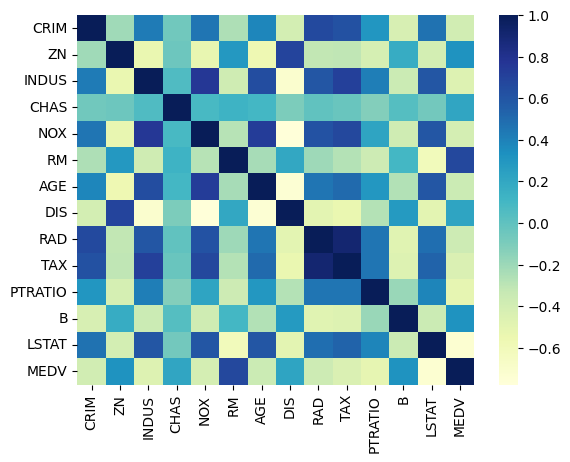

In [14]:
import seaborn as sns
sns.heatmap(train_set.corr(),cmap="YlGnBu")

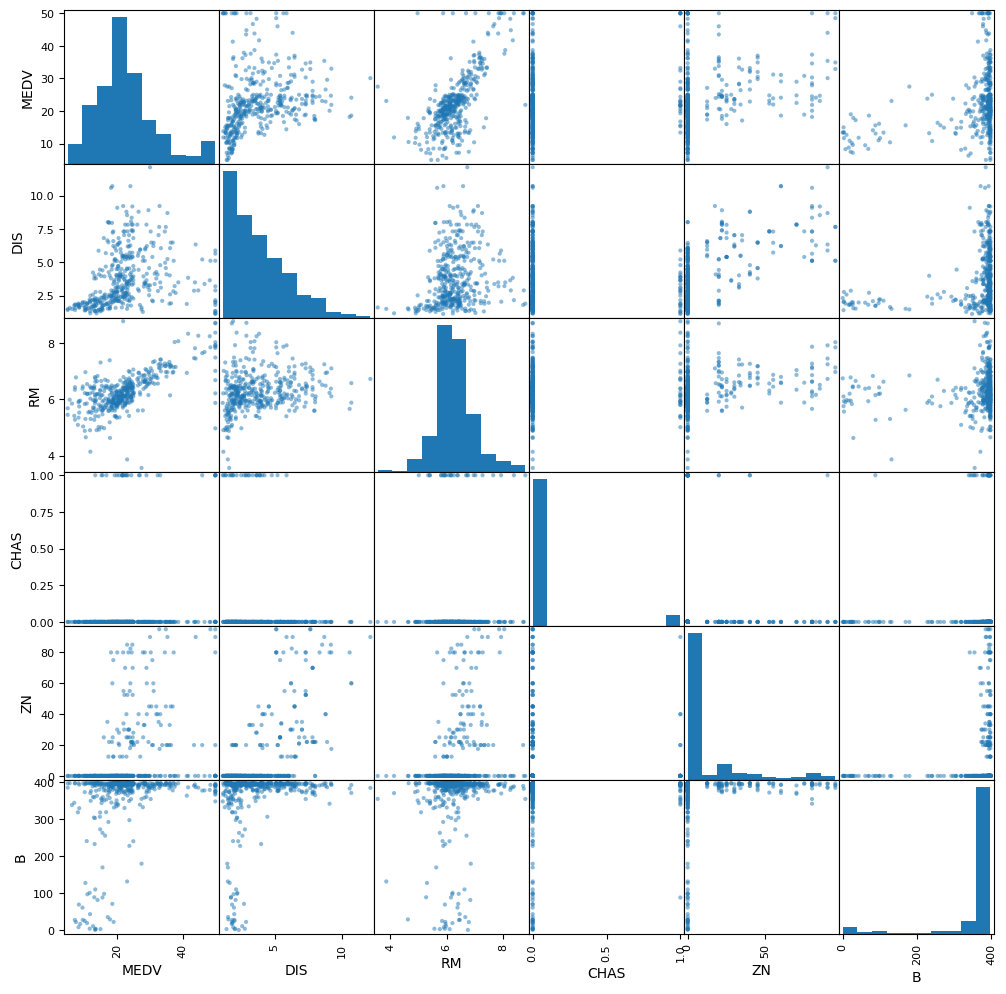

In [15]:
from pandas.plotting import scatter_matrix
scatter_matrix(housing_train[["MEDV","DIS","RM","CHAS","ZN","B"]], figsize=(12,12))
plt.show()

### Create labels

In [16]:
housing_train = strat_train.drop("MEDV", axis=1)
hosuing_lables= strat_train["MEDV"].copy()

## cheking for null 

In [17]:
housing_train.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [18]:
## There are no missing value.. Still we creat automation for new data 

In [19]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing_train)

SimpleImputer(strategy='median')

In [ ]:
imputer.statistics_

In [21]:
X=imputer.transform(housing_train)

In [22]:
housing_train=pd.DataFrame(X, columns=housing_train.columns)

##  Feature Scaling

There are two type of scaling

1- Normalization (Min-Max scaling)

2- standardization

# Pipeline

In [23]:
## make pipeline before creating any imputer now we just study 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipeline = Pipeline([("imputer", SimpleImputer(strategy= "median")),
                    ("Std_Scaler", StandardScaler())])


In [73]:
housing_train_pipe = pipeline.fit_transform(housing_train)
housing_train_pipe[10]

array([-0.40218817,  0.58870656, -0.91762693, -0.27288841, -1.10037254,
       -0.17644995, -0.77293136,  0.76762216, -0.63906128, -0.76418682,
        0.25695388,  0.36228508, -0.7101359 ])

In [25]:
housing_train_pipe.shape

(404, 13)

# Fitting the models

In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(housing_train_pipe, hosuing_lables)

LinearRegression()

In [27]:
## lets check the model with some data
dupli_data= housing_train.iloc[:10]
dupli_lable= hosuing_lables.iloc[:10]

In [28]:
pred_data = pipeline.transform(dupli_data)
model.predict(pred_data)

array([22.54409388, 21.65708375, 22.5749882 , 23.23433395, 30.38716087,
       16.96142605, 20.62306925, 22.75601781, 16.03153392, 25.05559684])

In [29]:
dupli_lable

125    21.4
71     21.7
502    20.6
471    19.6
200    32.9
449    13.0
16     23.1
108    19.8
146    15.6
164    22.7
Name: MEDV, dtype: float64

In [30]:
list(dupli_lable)

[21.4, 21.7, 20.6, 19.6, 32.9, 13.0, 23.1, 19.8, 15.6, 22.7]

In [31]:
## Model is working GOOD 

## RMSE
(Root Mean Squerd Error)

In [32]:
## evaluate the model
import numpy as np
from sklearn.metrics import mean_squared_error
prediction = model.predict(housing_train_pipe)
mse = mean_squared_error(hosuing_lables, prediction)
rmse = np.sqrt(mse)

In [33]:
rmse

4.811821402258368

In [34]:
## mse is high this is not the good model so discard the model  
## Lets check another model

In [35]:
from sklearn.tree import DecisionTreeRegressor
model1= DecisionTreeRegressor()
model1.fit(housing_train_pipe, hosuing_lables)

DecisionTreeRegressor()

In [36]:
## lets check the model with some data
dupli_data= housing_train.iloc[:5]
dupli_lable= hosuing_lables.iloc[:5]

In [37]:
pred_data = pipeline.transform(dupli_data)
model1.predict(pred_data)

array([21.4, 21.7, 20.6, 19.6, 32.9])

In [38]:
list(dupli_lable)

[21.4, 21.7, 20.6, 19.6, 32.9]

In [39]:
## evaluate the model
from sklearn.metrics import mean_squared_error
prediction = model1.predict(housing_train_pipe)
mse = mean_squared_error(hosuing_lables, prediction)
rmse = np.sqrt(mse)

In [40]:
rmse

0.0

In [41]:
## As we see here Our Model is overfit

In [42]:
from sklearn.ensemble import RandomForestRegressor
model2= RandomForestRegressor()
model2.fit(housing_train_pipe, hosuing_lables)

RandomForestRegressor()

In [43]:
from sklearn.metrics import mean_squared_error
prediction = model2.predict(housing_train_pipe)
mse = mean_squared_error(hosuing_lables, prediction)
rmse = np.sqrt(mse)

In [44]:
rmse

1.2332130415871363

In [45]:
## lets check the model with some data
dupli_data= housing_train.iloc[:5]
dupli_lable= hosuing_lables.iloc[:5]

In [46]:
pred_data = pipeline.transform(dupli_data)
model2.predict(pred_data)

array([20.579, 21.602, 20.348, 20.131, 33.678])

In [47]:
list(dupli_lable)

[21.4, 21.7, 20.6, 19.6, 32.9]

In [48]:
### RandomForest is Good model

In [49]:
## but there are overfitting so let's try Cross Validation

In [50]:
from sklearn.model_selection import cross_val_score
score= cross_val_score(model1, housing_train_pipe, hosuing_lables, scoring="neg_mean_squared_error",cv=10)
score

array([-12.04146341, -35.51170732, -29.94609756, -21.40219512,
       -17.72575   , -12.1235    , -19.15925   , -16.35325   ,
       -16.8695    , -31.8405    ])

In [51]:
rmse_score=np.sqrt(-score)
rmse_score

array([3.47008118, 5.95917002, 5.47230277, 4.62625065, 4.21019596,
       3.48188168, 4.37712805, 4.04391518, 4.10724969, 5.6427387 ])

## Saveing the Model

In [53]:
from joblib import dump,load
dump(model2, "RealEstate.joblib")

['RealEstate.joblib']

## Lets test the Model

In [66]:
X_test = test_set.drop('MEDV', axis=1)
Y_test = test_set["MEDV"]
X_test_prepd = pipeline.transform(X_test)
prediction = model2.predict(X_test_prepd)
test_mse = mean_squared_error(Y_test,prediction)
test_rmse = np.sqrt(test_mse)

In [67]:
test_rmse

1.4194205148719043

### Model is Fantastic

In [68]:
print(prediction)

[18.441 21.136 21.216 31.413 13.238 32.739 21.432 23.611 27.619 22.581
 20.37  23.193 19.064 24.297 24.812  9.55  19.032 22.563 14.047 13.44
 35.412 26.832 49.234 22.513 13.844 18.664  9.321 19.024 13.872 30.365
 18.222 19.99  19.336 15.008 22.46  19.602 23.449 37.021 30.932 26.31
 18.831 20.027 28.839 18.922 13.205 14.64  44.178 28.247  8.752 21.054
 26.343 32.331 14.352 12.167 25.022 10.044 33.982 48.18  14.07  17.852
 21.765 11.404 12.236 20.372 24.147 19.439 25.417 20.546 29.901 23.669
 18.53  13.307 45.014 18.71  18.777 15.48  17.935 35.682 42.092 14.332
 21.602 23.374 21.383 35.525 13.681 21.013 11.418 24.438 22.273  5.816
 22.181 23.873 23.155 14.39  19.103 22.553 49.022 19.426 14.01  21.793
 24.167 17.293]


In [70]:
print(list(Y_test))

[17.8, 21.5, 21.2, 32.4, 10.9, 31.7, 21.4, 24.3, 29.1, 25.0, 20.0, 22.2, 20.0, 24.8, 25.0, 10.4, 18.7, 24.4, 13.1, 13.1, 37.0, 26.6, 50.0, 23.3, 13.3, 18.6, 7.0, 19.4, 17.8, 31.0, 17.7, 20.8, 21.9, 15.4, 23.1, 19.6, 27.5, 37.9, 31.2, 28.7, 18.8, 23.2, 28.2, 19.3, 13.0, 13.8, 44.0, 29.4, 7.0, 22.5, 23.6, 33.0, 13.8, 12.8, 23.9, 8.5, 35.1, 48.5, 12.7, 17.1, 20.6, 11.5, 10.2, 21.8, 25.0, 21.4, 26.4, 20.3, 28.5, 22.0, 17.5, 12.7, 44.8, 18.5, 18.3, 19.4, 17.4, 36.5, 42.8, 13.2, 21.7, 24.3, 21.7, 37.2, 12.5, 21.2, 12.7, 24.7, 22.0, 5.0, 19.1, 27.1, 22.9, 10.4, 18.5, 23.1, 50.0, 18.5, 13.4, 21.6, 22.5, 15.3]


## Using the model

In [72]:
from joblib import load
model = load("RealEstate.joblib")

In [74]:
import numpy as np
features=np.array([[-0.40218817,  0.58870656, -0.91762693, -0.27288841, -1.10037254,
       -0.17644995, -0.77293136,  0.76762216, -0.63906128, -0.76418682,
        0.25695388,  0.36228508, -0.7101359 ]])

In [75]:
model.predict(features)

array([23.155])